In [3]:
import os
os.chdir("..")  # Moves up from 'scripts/' to your root project folder


In [4]:
#Imports and Setup
import os
import pandas as pd

raw_dir = "data/raw"
validated_dir = "data/validated"

# Create validated directory
os.makedirs(validated_dir, exist_ok=True)


In [24]:
#View All Raw Files
raw_files = sorted(
    [f for f in os.listdir(raw_dir) if f.endswith(".csv")]
)
print(f"{len(raw_files)} raw files found")
raw_files[:5]  # Show first 5


12 raw files found


['JC-202401-citibike-tripdata.csv',
 'JC-202402-citibike-tripdata.csv',
 'JC-202403-citibike-tripdata.csv',
 'JC-202404-citibike-tripdata.csv',
 'JC-202405-citibike-tripdata.csv']

In [31]:
#Load One File and Display Columns
sample_file = raw_files[11]
df = pd.read_csv(os.path.join(raw_dir, sample_file))
print(f"Loaded {sample_file} with shape {df.shape}")
df.columns


Loaded JC-202412-citibike-tripdata.csv with shape (54833, 13)


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [32]:
#Check for Timestamp Columns
assert "started_at" in df.columns and "ended_at" in df.columns, "Timestamp columns missing!"


In [33]:
# Preview timestamp column formats
print("Sample `started_at` values:")
print(df["started_at"].head(5))
print("\nSample `ended_at` values:")
print(df["ended_at"].head(5))


Sample `started_at` values:
0    2024-12-06 17:50:49.428
1    2024-12-14 11:01:00.309
2    2024-12-24 08:07:17.475
3    2024-12-19 12:48:05.452
4    2024-12-17 11:19:37.631
Name: started_at, dtype: object

Sample `ended_at` values:
0    2024-12-06 17:54:20.070
1    2024-12-14 11:12:01.382
2    2024-12-24 08:14:14.612
3    2024-12-19 12:54:15.253
4    2024-12-17 11:28:25.150
Name: ended_at, dtype: object


In [35]:
# Preview all columns for the first 5 rows
df.head(10)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,28A17ACD224CD80B,electric_bike,2024-12-06 17:50:49.428,2024-12-06 17:54:20.070,Oakland Ave,JC022,Hilltop,JC019,40.737604,-74.052478,40.731169,-74.057574,member
1,3508393A86FBD357,classic_bike,2024-12-14 11:01:00.309,2024-12-14 11:12:01.382,Oakland Ave,JC022,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.737604,-74.052478,40.735938,-74.030305,member
2,75FA4C03A1447401,electric_bike,2024-12-24 08:07:17.475,2024-12-24 08:14:14.612,Oakland Ave,JC022,Leonard Gordon Park,JC080,40.737604,-74.052478,40.745910,-74.057271,member
3,C7741EF495C597DD,classic_bike,2024-12-19 12:48:05.452,2024-12-19 12:54:15.253,Oakland Ave,JC022,Leonard Gordon Park,JC080,40.737604,-74.052478,40.745910,-74.057271,member
4,07952BB20B46C5B1,electric_bike,2024-12-17 11:19:37.631,2024-12-17 11:28:25.150,Oakland Ave,JC022,Grove St PATH,JC115,40.737604,-74.052478,40.719410,-74.043090,casual
5,431601566E33CCB7,electric_bike,2024-12-16 15:57:04.184,2024-12-16 16:01:23.502,Oakland Ave,JC022,Southwest Park - Jackson St & Observer Hwy,HB401,40.737604,-74.052478,40.737551,-74.041664,member
6,FB052BAFC90AF0AB,electric_bike,2024-12-15 00:39:04.916,2024-12-15 01:02:26.732,Oakland Ave,JC022,Oakland Ave,JC022,40.737604,-74.052478,40.737604,-74.052478,casual
7,98239E90D8714A23,electric_bike,2024-12-16 18:14:01.854,2024-12-16 18:19:14.977,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,6 St & Grand St,HB302,40.736982,-74.027781,40.744398,-74.034501,member
8,505BF82173A81F99,electric_bike,2024-12-04 18:25:39.604,2024-12-04 18:30:58.504,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,6 St & Grand St,HB302,40.736982,-74.027781,40.744398,-74.034501,member
9,A0DAEB761EC2ADD1,electric_bike,2024-12-08 11:03:23.746,2024-12-08 11:07:59.119,Baldwin at Montgomery,JC020,Baldwin at Montgomery,JC020,40.723659,-74.064194,40.723659,-74.064194,member


In [36]:
#Add duration column
df_cp = df.copy()
df_cp["duration"] = pd.to_datetime(df_cp["ended_at"]) - pd.to_datetime(df_cp["started_at"])
df_cp.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,28A17ACD224CD80B,electric_bike,2024-12-06 17:50:49.428,2024-12-06 17:54:20.070,Oakland Ave,JC022,Hilltop,JC019,40.737604,-74.052478,40.731169,-74.057574,member,0 days 00:03:30.642000
1,3508393A86FBD357,classic_bike,2024-12-14 11:01:00.309,2024-12-14 11:12:01.382,Oakland Ave,JC022,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.737604,-74.052478,40.735938,-74.030305,member,0 days 00:11:01.073000
2,75FA4C03A1447401,electric_bike,2024-12-24 08:07:17.475,2024-12-24 08:14:14.612,Oakland Ave,JC022,Leonard Gordon Park,JC080,40.737604,-74.052478,40.745910,-74.057271,member,0 days 00:06:57.137000
3,C7741EF495C597DD,classic_bike,2024-12-19 12:48:05.452,2024-12-19 12:54:15.253,Oakland Ave,JC022,Leonard Gordon Park,JC080,40.737604,-74.052478,40.745910,-74.057271,member,0 days 00:06:09.801000
4,07952BB20B46C5B1,electric_bike,2024-12-17 11:19:37.631,2024-12-17 11:28:25.150,Oakland Ave,JC022,Grove St PATH,JC115,40.737604,-74.052478,40.719410,-74.043090,casual,0 days 00:08:47.519000


In [38]:
#Remove Zero/Negative Durations
df_cp = df_cp[df_cp["duration"].dt.total_seconds() > 60]  # Remove rides ≤ 60s
print(f"{len(df_cp)} valid rows remaining (duration > 60 seconds)")
df_cp["duration"].describe()


54833 valid rows remaining (duration > 60 seconds)


count                        54833
mean     0 days 00:08:10.996458209
std      0 days 00:32:42.017253277
min         0 days 00:01:00.208000
25%         0 days 00:03:44.239000
50%         0 days 00:05:28.087000
75%         0 days 00:08:13.033000
max         1 days 00:59:57.506000
Name: duration, dtype: object

In [39]:
df_cp = df_cp.dropna(subset=["start_station_id", "end_station_id", "start_lat", "start_lng", "end_lat", "end_lng", "duration"])


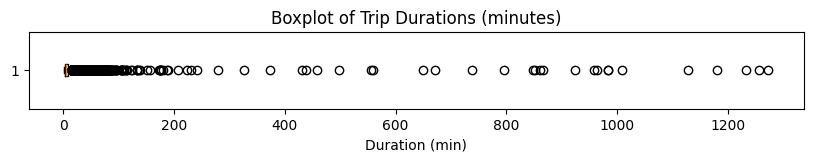

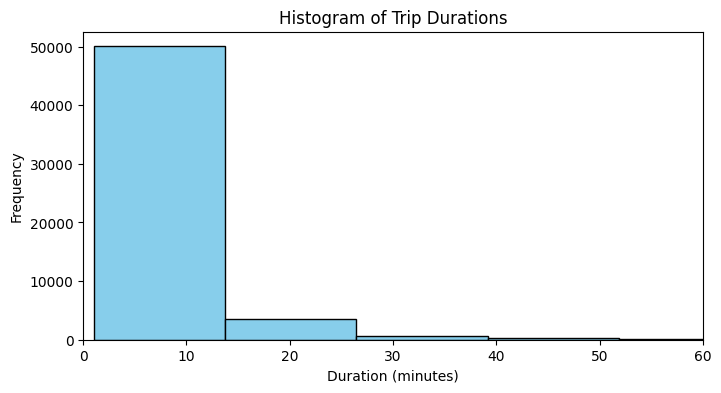

In [40]:
import matplotlib.pyplot as plt

# Convert duration to minutes
df_cp["duration_minutes"] = df_cp["duration"].dt.total_seconds() / 60

# Boxplot
plt.figure(figsize=(10, 1))
plt.boxplot(df_cp["duration_minutes"], vert=False)
plt.title("Boxplot of Trip Durations (minutes)")
plt.xlabel("Duration (min)")
plt.show()

# Histogram
plt.figure(figsize=(8, 4))
plt.hist(df_cp["duration_minutes"], bins=100, color="skyblue", edgecolor="black")
plt.title("Histogram of Trip Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.xlim(0, 60)  # limit to 1 hour for visibility
plt.show()


In [42]:
# Count how many rows exceed 2 hours
outlier_count = (df_cp["duration"].dt.total_seconds() > 120 * 60).sum()
print(f"⛔️ Outliers (duration > 2 hours): {outlier_count} rows")


⛔️ Outliers (duration > 2 hours): 0 rows


In [43]:
# Final clean-up: remove trips longer than 2 hours (120 minutes)
df_cp = df_cp[df_cp["duration"].dt.total_seconds() <= 120 * 60]
print(f"{len(df_cp)} rows retained after filtering out long trips (> 2 hours)")


54617 rows retained after filtering out long trips (> 2 hours)


In [44]:
#future timestamps check 
from datetime import datetime

# Convert columns if not already datetime
df_cp["started_at"] = pd.to_datetime(df_cp["started_at"])
df_cp["ended_at"] = pd.to_datetime(df_cp["ended_at"])

# Get current timestamp
now = datetime.now()

# Find future timestamps
future_start = df_cp[df_cp["started_at"] > now]
future_end = df_cp[df_cp["ended_at"] > now]

print(f"{len(future_start)} rows with future started_at")
print(f"{len(future_end)} rows with future ended_at")


0 rows with future started_at
0 rows with future ended_at


In [45]:
#Check for Duplicate Records
# Check for exact duplicates
exact_dupes = df_cp[df_cp.duplicated()]
print(f"Exact duplicate rows: {len(exact_dupes)}")

# Optionally: Check duplicates based on specific columns (excluding 'ride_id')
subset_dupes = df_cp[df_cp.duplicated(subset=["started_at", "start_station_id", "end_station_id", "duration"])]
print(f"Subset duplicate rows: {len(subset_dupes)}")


Exact duplicate rows: 0
Subset duplicate rows: 0


In [46]:
#check for unexpected or inconsistent value
print("Rideable Types:\n", df_cp["rideable_type"].value_counts(dropna=False))
print("\nMember Categories:\n", df_cp["member_casual"].value_counts(dropna=False))


Rideable Types:
 rideable_type
electric_bike    37104
classic_bike     17513
Name: count, dtype: int64

Member Categories:
 member_casual
member    45054
casual     9563
Name: count, dtype: int64


In [47]:
import os
validated_dir = "data/validated"
os.makedirs(validated_dir, exist_ok=True)


In [48]:
import os
import pandas as pd

raw_dir = "data/raw"
validated_dir = "data/validated"
os.makedirs(validated_dir, exist_ok=True)

raw_files = [f for f in os.listdir(raw_dir) if f.endswith(".csv")]

for fname in raw_files:
    df = pd.read_csv(os.path.join(raw_dir, fname))
    
    # Copy and compute duration
    df_cp = df.copy()
    df_cp["duration"] = pd.to_datetime(df_cp["ended_at"]) - pd.to_datetime(df_cp["started_at"])
    
    # Apply cleaning filters
    df_cp = df_cp[df_cp["duration"].dt.total_seconds() > 60]               # Keep trips > 1 minute
    df_cp = df_cp[df_cp["duration"].dt.total_seconds() <= 120 * 60]       # Keep trips ≤ 2 hours
    df_cp = df_cp.dropna(subset=["start_station_id", "end_station_id", 
                                 "start_lat", "start_lng", "end_lat", "end_lng", "duration"])
    
    # Save cleaned file
    df_cp.to_csv(os.path.join(validated_dir, fname), index=False)
    print(f"✅ Saved cleaned file: {fname}")



✅ Saved cleaned file: JC-202412-citibike-tripdata.csv
✅ Saved cleaned file: JC-202404-citibike-tripdata.csv
✅ Saved cleaned file: JC-202410-citibike-tripdata.csv
✅ Saved cleaned file: JC-202406-citibike-tripdata.csv
✅ Saved cleaned file: JC-202408-citibike-tripdata.csv
✅ Saved cleaned file: JC-202402-citibike-tripdata.csv
✅ Saved cleaned file: JC-202405-citibike-tripdata.csv
✅ Saved cleaned file: JC-202407-citibike-tripdata.csv
✅ Saved cleaned file: JC-202411-citibike-tripdata.csv
✅ Saved cleaned file: JC-202401-citibike-tripdata.csv
✅ Saved cleaned file: JC-202409-citibike-tripdata.csv
✅ Saved cleaned file: JC-202403-citibike-tripdata.csv
